In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile 
import random

In [3]:
dataset_path = "D:\intel_workshop\cats_and_dogs_filtered (1).zip"
extract_path = "cats_and_dogs"


In [4]:
if not os.path.exists(extract_path):
    print("Extracting dataset....")
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction Complete!")

Extracting dataset....
Extraction Complete!


In [5]:
train_dir = os.path.join(extract_path, "cats_and_dogs_filtered/train/")
val_dir = os.path.join(extract_path, "cats_and_dogs_filtered/validation/")

In [6]:
from PIL import Image
cat_dir = os.path.join(train_dir, "cats")

In [7]:
image_files = os.listdir(cat_dir)

In [8]:
print("avaiable images:", image_files[:5])

avaiable images: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']


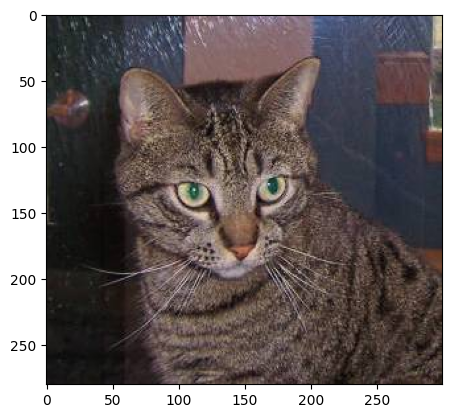

In [9]:
image_path = os.path.join(cat_dir, image_files[1])
image = Image.open(image_path)
plt.imshow(image)

In [10]:
# preprocess image

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")

Found 2000 images belonging to 2 classes.


In [12]:
val_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")

Found 1000 images belonging to 2 classes.


In [13]:
# Build Cnn Model
import keras


In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150 ,3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')   # binary classification

])


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.4941 - loss: 0.6962 - val_accuracy: 0.5130 - val_loss: 0.6930
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.5271 - loss: 0.6978 - val_accuracy: 0.5200 - val_loss: 0.6910
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.5165 - loss: 0.6918 - val_accuracy: 0.5560 - val_loss: 0.6831
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5635 - loss: 0.6747 - val_accuracy: 0.5470 - val_loss: 0.6843
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.5676 - loss: 0.6743 - val_accuracy: 0.6190 - val_loss: 0.6570
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6497 - loss: 0.6389 - val_accuracy: 0.6160 - val_loss: 0.6593
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6459 - loss: 0.6401 - val_accuracy: 0.6620 - val_loss: 0.6491
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6936 - loss: 0.5934 - val_accuracy: 0.6910 - val_lo

In [18]:
model.save("cat_dog_classifier.h5")
print("model saved successfully")

model saved successfully


In [19]:
loss, accuracy =  model.evaluate(val_generator)

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - accuracy: 0.7265 - loss: 0.5649


In [20]:
print(f' validation Accuracy :{accuracy *100:.2f}%')

 validation Accuracy :73.00%


In [21]:
import os
print(os.path.exists("cat_dog_classifier.h5"))

True
